In [1]:
import pandas as pd

df = pd.read_csv(r'..\JNB_data\titanic.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
required_df = df[['Survived','Pclass','Sex','Age','Fare']]

In [6]:
required_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [7]:
required_df['Age_rounded'] = required_df['Age'].fillna(required_df['Age'].mean())

C:\Users\Windows\AppData\Local\Temp\ipykernel_12992\1886822804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_df['Age_rounded'] = required_df['Age'].fillna(required_df['Age'].mean())


using mean to fill missing values preserves the overall average of the data, which is useful when the data is normally distributed and you want to maintain the central tendency. On the other hand, using median is especially useful when the data is skewed or contains outliers, as it provides a more robust measure of central tendency that is less affected by extreme values.

In [8]:
required_df['Age_rounded'] = required_df['Age_rounded'].apply(lambda x: int(round(x,1)) )

C:\Users\Windows\AppData\Local\Temp\ipykernel_12992\1400635411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_df['Age_rounded'] = required_df['Age_rounded'].apply(lambda x: int(round(x,1)) )


In [9]:
required_df.describe()

,Survived,Pclass,Age,Fare,Age_rounded
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,29.544332
std,0.486592,0.836071,14.526497,49.693429,13.013778
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,7.910400,22.000000
50%,0.000000,3.000000,28.000000,14.454200,29.000000
75%,1.000000,3.000000,38.000000,31.000000,35.000000
max,1.000000,3.000000,80.000000,512.329200,80.000000


In [10]:
required_df.drop('Age',axis=1,inplace=True)
required_df.isna().sum()

C:\Users\Windows\AppData\Local\Temp\ipykernel_12992\2400542062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_df.drop('Age',axis=1,inplace=True)


Survived       0
Pclass         0
Sex            0
Fare           0
Age_rounded    0
dtype: int64

In [11]:
required_df.groupby('Survived').mean(numeric_only=True)

,Pclass,Fare,Age_rounded
Survived,,,
0,2.531876,22.117887,30.240437
1,1.950292,48.395408,28.426901


In [12]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
required_df['sex_n'] = le_sex.fit_transform(required_df['Sex'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_12992\154950363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_df['sex_n'] = le_sex.fit_transform(required_df['Sex'])


In [53]:
# LE or this --> df_dummies = pd.get_dummies(required_df.Sex,prefix='sex',drop_first=True)

In [13]:
required_df.drop('Sex', axis=1, inplace=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_12992\484500242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_df.drop('Sex', axis=1, inplace=True)


In [14]:
required_df

,Survived,Pclass,Fare,Age_rounded,sex_n
0,0,3,7.2500,22,1
1,1,1,71.2833,38,0
2,1,3,7.9250,26,0
3,1,1,53.1000,35,0
4,0,3,8.0500,35,1
...,...,...,...,...,...
886,0,2,13.0000,27,1
887,1,1,30.0000,19,0
888,0,3,23.4500,29,0
889,1,1,30.0000,26,1


In [15]:
X = required_df.drop('Survived', axis=1)
y = required_df.Survived

In [16]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=100)

# Fit logistic regression model to the training data
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
log_reg_model.score(X_test, y_test)

0.770949720670391

In [27]:
# or
y_pred = log_reg_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.770949720670391

Resampling Techniques:
# To mitigate skewed data, we go for resampling techniques.
    Undersampling: Randomly remove samples from the majority class to balance the class distribution.
    Oversampling: Duplicate samples from the minority class or generate synthetic samples to increase its representation.
    SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class based on interpolation of existing samples.

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

After training and evaluating these models, you should see that decision trees and random forests generally outperform logistic regression on skewed datasets. This improvement occurs because decision trees and random forests can capture non-linear relationships and handle class imbalances more effectively than logistic regression. Random forests, in particular, are robust to overfitting and can provide better generalization performance.

overfitting: tight t-shirt. a line drawn is more specific training data(so higher accuracy for training data) and when we introduce test data, we will have poor accuracy.

Decision Tree and Random Forests performs better compared to Logisitic Regression when the dataset is skewed.
Decision Tree: create a Tree structure data by taking input features and creates if else flow charts(the leaf node stores the target corresponding to such input features).
for the new data, it follows that flowchart and gives the output accordingly.
    leaf nodes may represent target variables which are choosen based on the majority in each subset.
Decision Tree could cause overfitting of the training data. to avoid this, we use multiple decision trees on different sub datasets and we take average of it.
this is what we call Random Forest( many trees).
also called ensemble(a group of items viewed as a whole rather than individually) learning.

In [31]:
model.score(X_test, y_test)

0.7932960893854749

In [50]:
y_pred = model.predict(X_test)

In [38]:
model.predict([[1,7.75,89,0]])

C:\Python_Vignesh\ML_venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [35]:
print(X_test.head())
print(y_test.head())

     Pclass      Fare  Age_rounded  sex_n
32        3    7.7500           29      0
276       3    7.7500           45      0
770       3    9.5000           24      1
13        3   31.2750           39      1
258       1  512.3292           35      0
32     1
276    0
770    0
13     0
258    1
Name: Survived, dtype: int64


In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [52]:
cm

array([[88, 18],
       [19, 54]], dtype=int64)

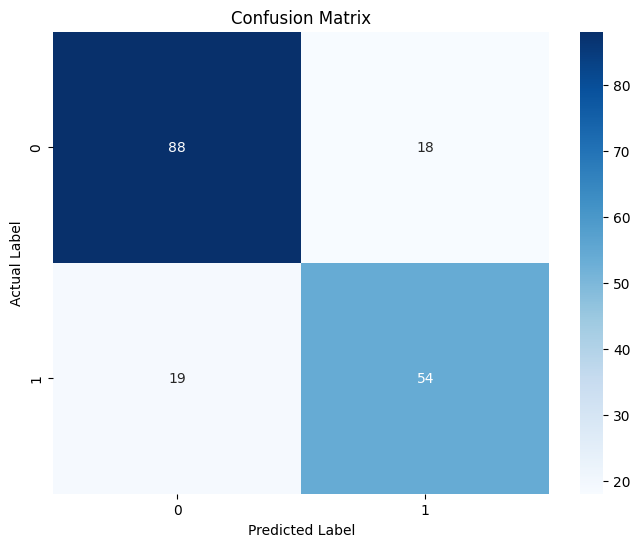

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [45]:
len(X_test)

179